In [1]:
import pandas as pd
from sklearn import datasets

In [2]:
# <아이리스 꽃> 데이터 셋 가져오기
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
# 데이터 셋 중에서 특징벡터만 data 변수로 저장
data = iris['data']
data[:5]  # 상위 5개 데이터 보기

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
from sklearn.cluster import KMeans

# k평균 군집화 모델 설정 (3개 군집)
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [5]:
# 아이리스 꽃 특징벡터들에 k평균 군집화 실행
model.fit(data)

KMeans(n_clusters=3)

In [6]:
# 군집화 결과를 군집 번호(0, 1, 2)로 표시
labels = model.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [7]:
# 실제 붓꽃 타겟값
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# 군집별 센터값
centers = model.cluster_centers_
centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

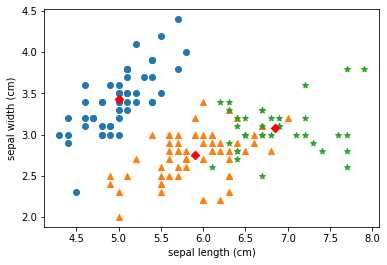

In [9]:
import matplotlib.pyplot as plt

# 가로축, 세로축 제목 표시
plt.xlabel(iris['feature_names'][0]) # sepal length
plt.ylabel(iris['feature_names'][1]) # sepal width

# 그래프 그리기
cluster1 = data[labels == 0] # 첫번째 군집
plt.scatter(cluster1[:, 0], cluster1[:, 1], marker="o")

cluster2 = data[labels == 1] # 두번째 군집
plt.scatter(cluster2[:, 0], cluster2[:, 1], marker="^")

cluster3 = data[labels == 2] # 세번째 군집
plt.scatter(cluster3[:, 0], cluster3[:, 1], marker="*")

# 센터값
plt.scatter(x=centers[:,0], y=centers[:,1], marker='D', c='r')

plt.show()

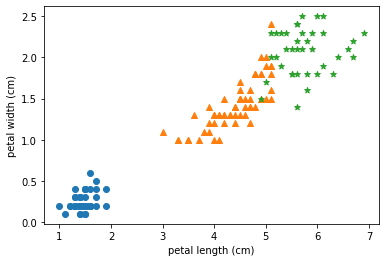

In [10]:
# 가로축, 세로축 제목 표시
plt.xlabel(iris['feature_names'][2]) # petal length
plt.ylabel(iris['feature_names'][3]) # petal width

# 그래프 그리기
cluster1 = data[labels == 0] # 첫번째 군집
plt.scatter(cluster1[:, 2], cluster1[:, 3], marker="o")

cluster2 = data[labels == 1] # 두번째 군집
plt.scatter(cluster2[:, 2], cluster2[:, 3], marker="^")

cluster3 = data[labels == 2] # 세번째 군집
plt.scatter(cluster3[:, 2], cluster3[:, 3], marker="*")

# 센터값
#plt.scatter(x=centers[:,2], y=centers[:,3], marker='D', c='r')

plt.show()